In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import re
import os
import itertools

from jitter import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
matplotlib.rcParams['figure.dpi'] = 110

In [12]:
attention_maps = pd.read_pickle('../attention-maps-ucf101-with-metadata.pickle')

In [13]:
jitter_df = attention_maps.groupby(['Network', 'EBP Type']).apply(jitter)
jitter_df.reset_index(drop=True, inplace=True)
jitter_df.head()

,Action,Clip,EBP Type,Frame,Jitter,Network,Video,Window Size
0,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,1,39.643074,Spatial,04,1
1,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,2,96.708359,Spatial,04,1
2,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,3,79.917984,Spatial,04,1
3,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,4,78.418068,Spatial,04,1
4,ApplyEyeMakeup,v_ApplyEyeMakeup_g04_c01,Contrastive,5,68.907013,Spatial,04,1


/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


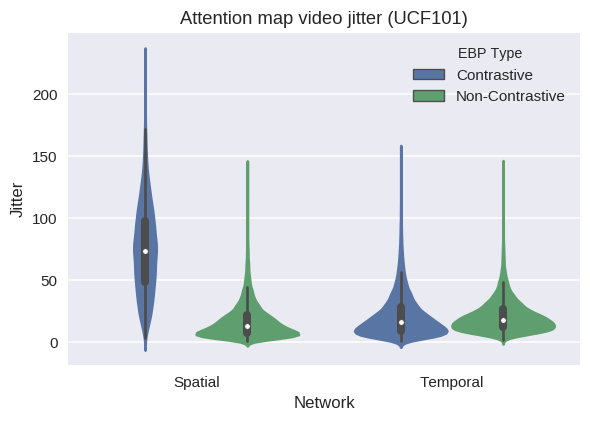

In [16]:
sns.violinplot(x='Network', y='Jitter', hue='EBP Type', data=jitter_df)
plt.title("Attention map video jitter (UCF101)")

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


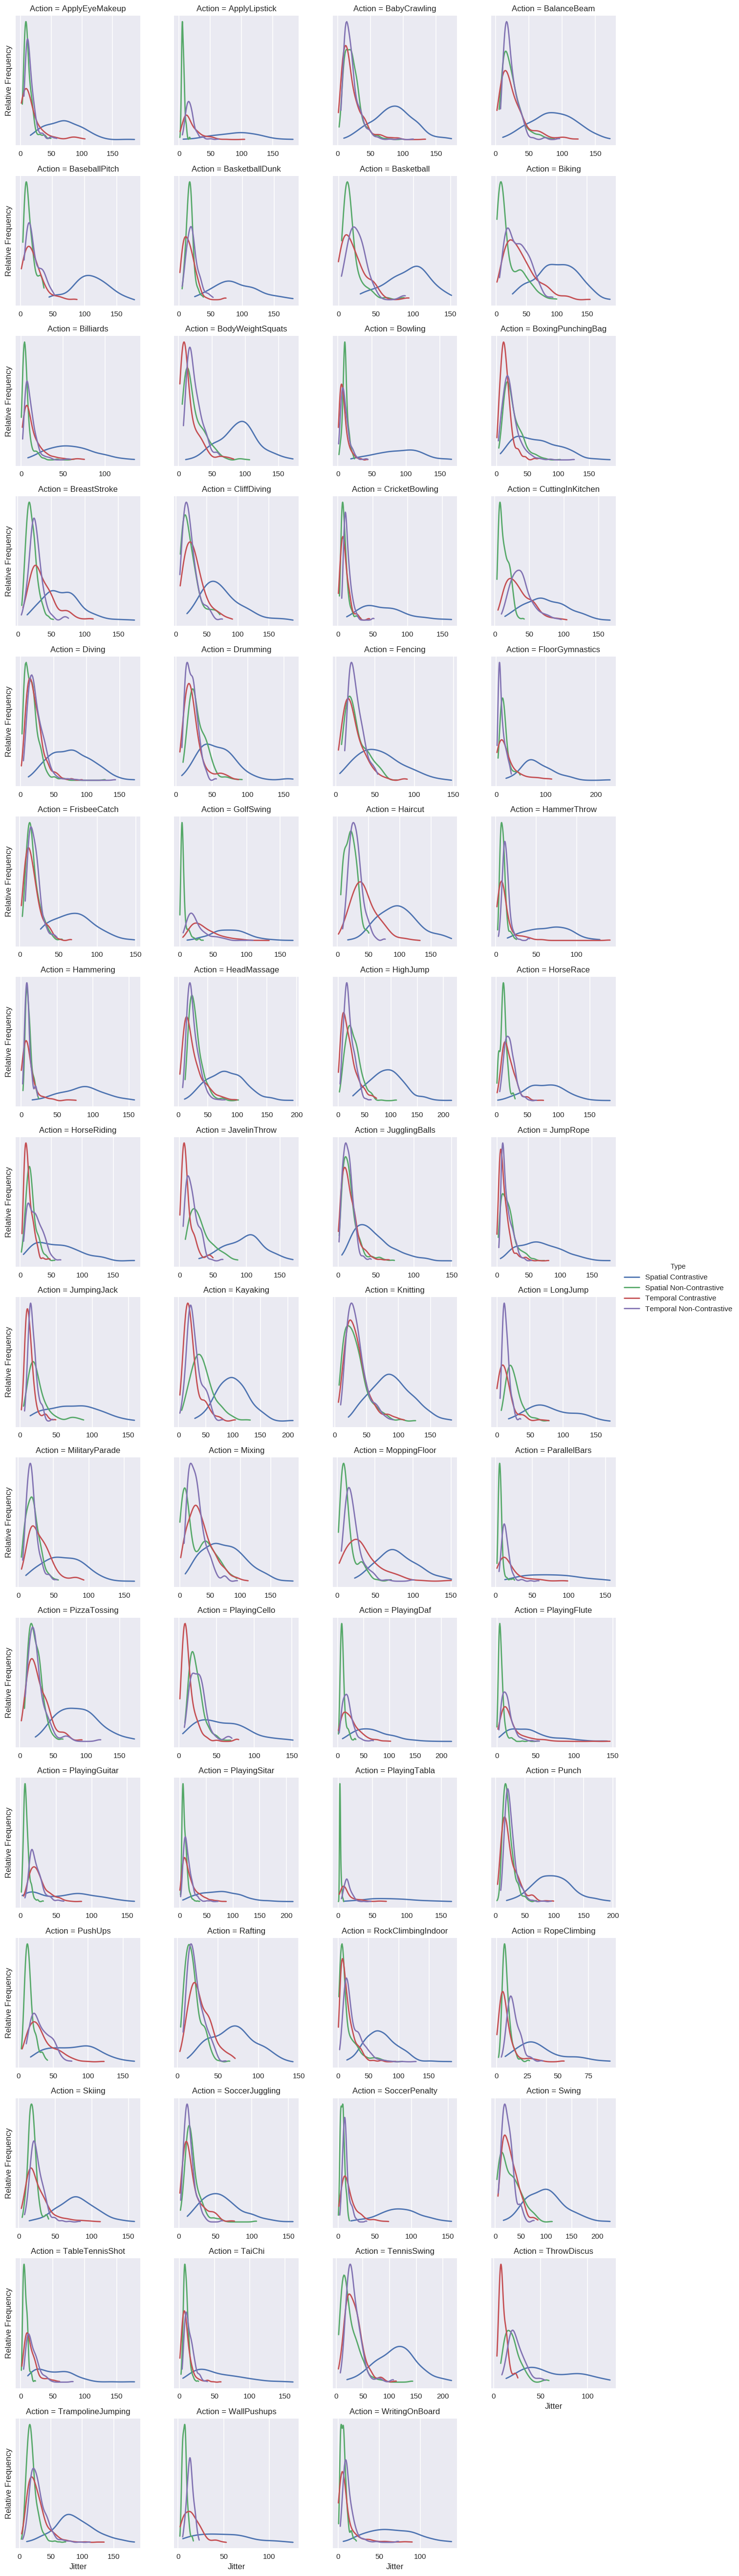

In [15]:
jitter_df['Type'] = jitter_df['Network'] + " " + jitter_df['EBP Type']
grid = sns.FacetGrid(data=jitter_df, 
                     col='Action', 
                     hue="Type",
                     col_wrap=4, 
                     sharey=False,
                     sharex=False
                     )
grid.map(sns.distplot, "Jitter", hist=False)
grid.set_ylabels("Relative Frequency")
grid.set(yticks=[])
grid.add_legend()